In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import warnings

import matplotlib

# import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns

# import xarray as xr
from joblib import dump, load
from matplotlib import cm
from matplotlib import pyplot as plt
from sklearn.inspection import PartialDependenceDisplay, permutation_importance
matplotlib.rcParams['figure.dpi'] = 300
warnings.simplefilter(action="ignore", category=FutureWarning)
import json

In [5]:
# labels dictionary
with open('../../../var_labels.json', "r") as fp:
    # Load the dictionary from the file
    labels_dict = json.load(fp)

## day

In [7]:
# load data
X_train = pd.read_csv("xtrain.csv", index_col=0)
y_train = pd.read_csv("ytrain.csv", index_col=0)
X_test = pd.read_csv("xtest.csv", index_col=0)
y_test = pd.read_csv("ytest.csv", index_col=0)
groups = X_train["groups"]
X_train = X_train.drop(columns="groups")
feature_names = list(X_train.columns)

In [8]:
# load model
model_day = load("forest.joblib")
best_model = model_day.best_estimator_

In [9]:
# Validation on test set
print(
    "Validation score:\ntraining set: r2 = {:3.2f}\ntest set: r2 = {:3.2f}".format(
        best_model.score(X_train, y_train), best_model.score(X_test, y_test)
    )
)

Validation score:
training set: r2 = 0.99
test set: r2 = 0.92


### feature importance


#### permutation - test set

In [56]:
color_list = ["#19535f", "#0b7a75", "#d7c9aa", "#ed6a5e", "#7b2d26"]

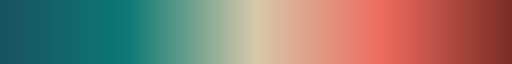

In [58]:
matplotlib.colors.LinearSegmentedColormap.from_list("name", color_list)

In [60]:
forest_FI = pd.read_csv("forest_FI.csv", index_col=0)

In [62]:
forest_importances = forest_FI[-6:].rename(index=labels_dict)

In [64]:
matplotlib.rcParams['figure.dpi'] = 300
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("name", color_list)

In [66]:
c1 = cmap(0.2)
c2 = cmap(0.4)
c3 = cmap(0.7)

C:\Users\samue\AppData\Local\Temp\ipykernel_8988\3478835978.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(X_train['gradU'], y_train, alpha=0.7,s=10, c=c2,zorder=4)
C:\Users\samue\AppData\Local\Temp\ipykernel_8988\3478835978.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(X_train['tke'], y_train, alpha=0.4,s=10, c=c3,zorder=4)


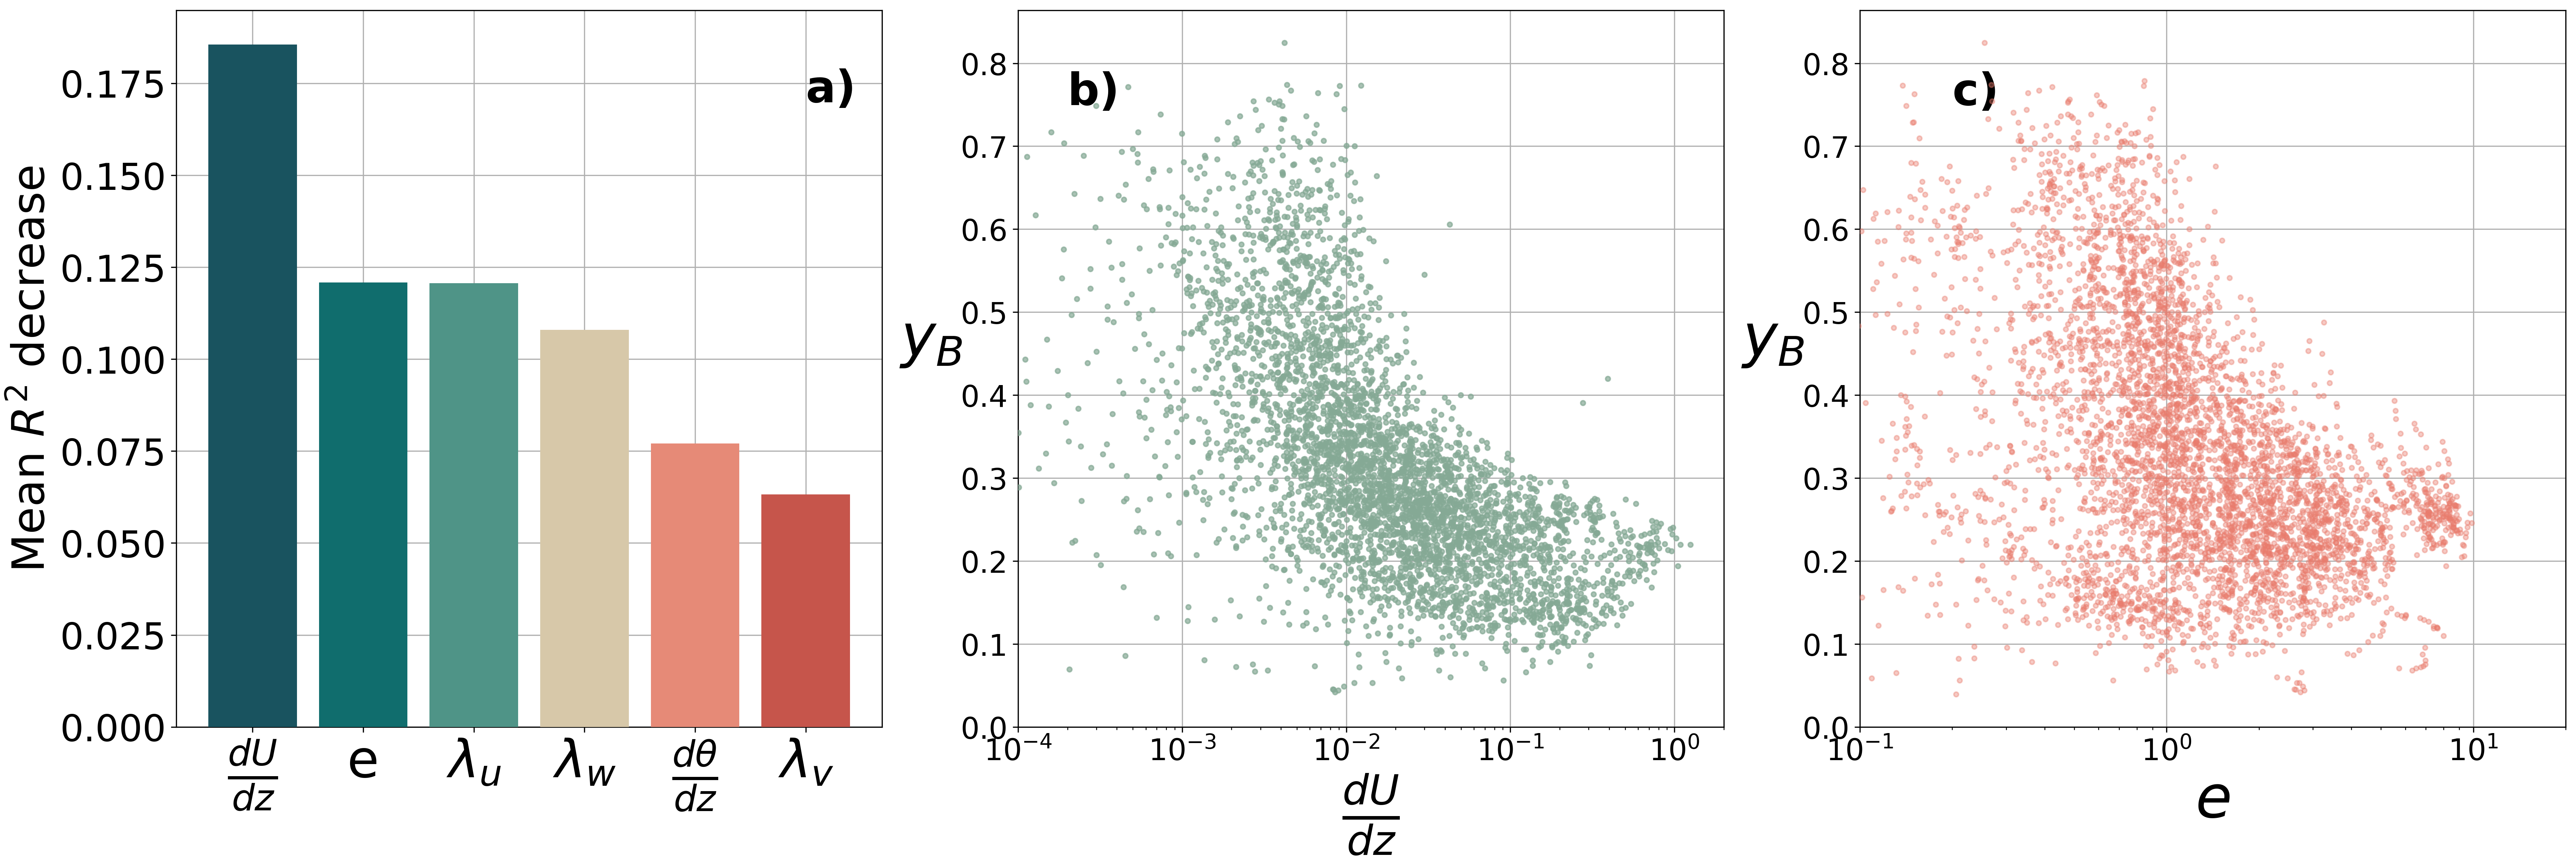

In [68]:
color_list = ["#19535f", "#0b7a75", "#d7c9aa", "#ed6a5e", "#7b2d26"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("name", color_list)
color_list=[cmap(i/6) for i in range(6)]

# plot permutation feature importances
fig, axs = plt.subplots(1,3,figsize=(24, 8), constrained_layout=True)

ax = axs[0]
ax.bar(list(forest_importances[::-1].index),forest_importances[::-1].values.flatten(), color=color_list,zorder=4) 
# ax.set_title("PFI", fontsize=30)
ax.set_ylabel("Mean $R^2$ decrease", fontsize=30)
for item in ax.get_xticklabels():
    item.set_fontsize(35)
for item in ax.get_yticklabels():
    item.set_fontsize(25)
#ax.set_yticks([0.05,0.1,0.15,0.2,0.25])
ax.grid(zorder=2)

ax = axs[1]
ax.scatter(X_train['gradU'], y_train, alpha=0.7,s=10, c=c2,zorder=4)
ax.set_xscale('log')
for item in ax.get_xticklabels()+ax.get_yticklabels():
    item.set_fontsize(20)
ax.set_xlabel(r"$\frac{dU}{dz}$", fontsize=40)
ax.set_ylabel(r"$y_B$", fontsize=40, rotation=0, labelpad=20)
ax.grid(zorder=2)
ax.set_xlim([1e-4,2])

ax = axs[2]
ax.scatter(X_train['tke'], y_train, alpha=0.4,s=10, c=c3,zorder=4)
ax.set_xscale('log')
for item in ax.get_xticklabels()+ax.get_yticklabels():
    item.set_fontsize(20)
ax.set_xlabel(r"$e$", fontsize=40)
ax.set_ylabel(r"$y_B$", fontsize=40, rotation=0, labelpad=20)
ax.grid(zorder=2)
ax.set_xlim([1e-1,20])


axs[0].text(5, 0.17, 'a)', fontsize=30, fontweight='bold')
axs[1].text(2e-4, 0.75, 'b)', fontsize=30, fontweight='bold')
axs[2].text(0.2, 0.75, 'c)', fontsize=30, fontweight='bold')

plt.savefig('Metcrax_day_dimFI.png')

In [46]:
REE_FI = pd.read_csv("REE_FI.csv", index_col=0)
forest_importances = REE_FI[-10:].rename(
    index=labels_dict
)

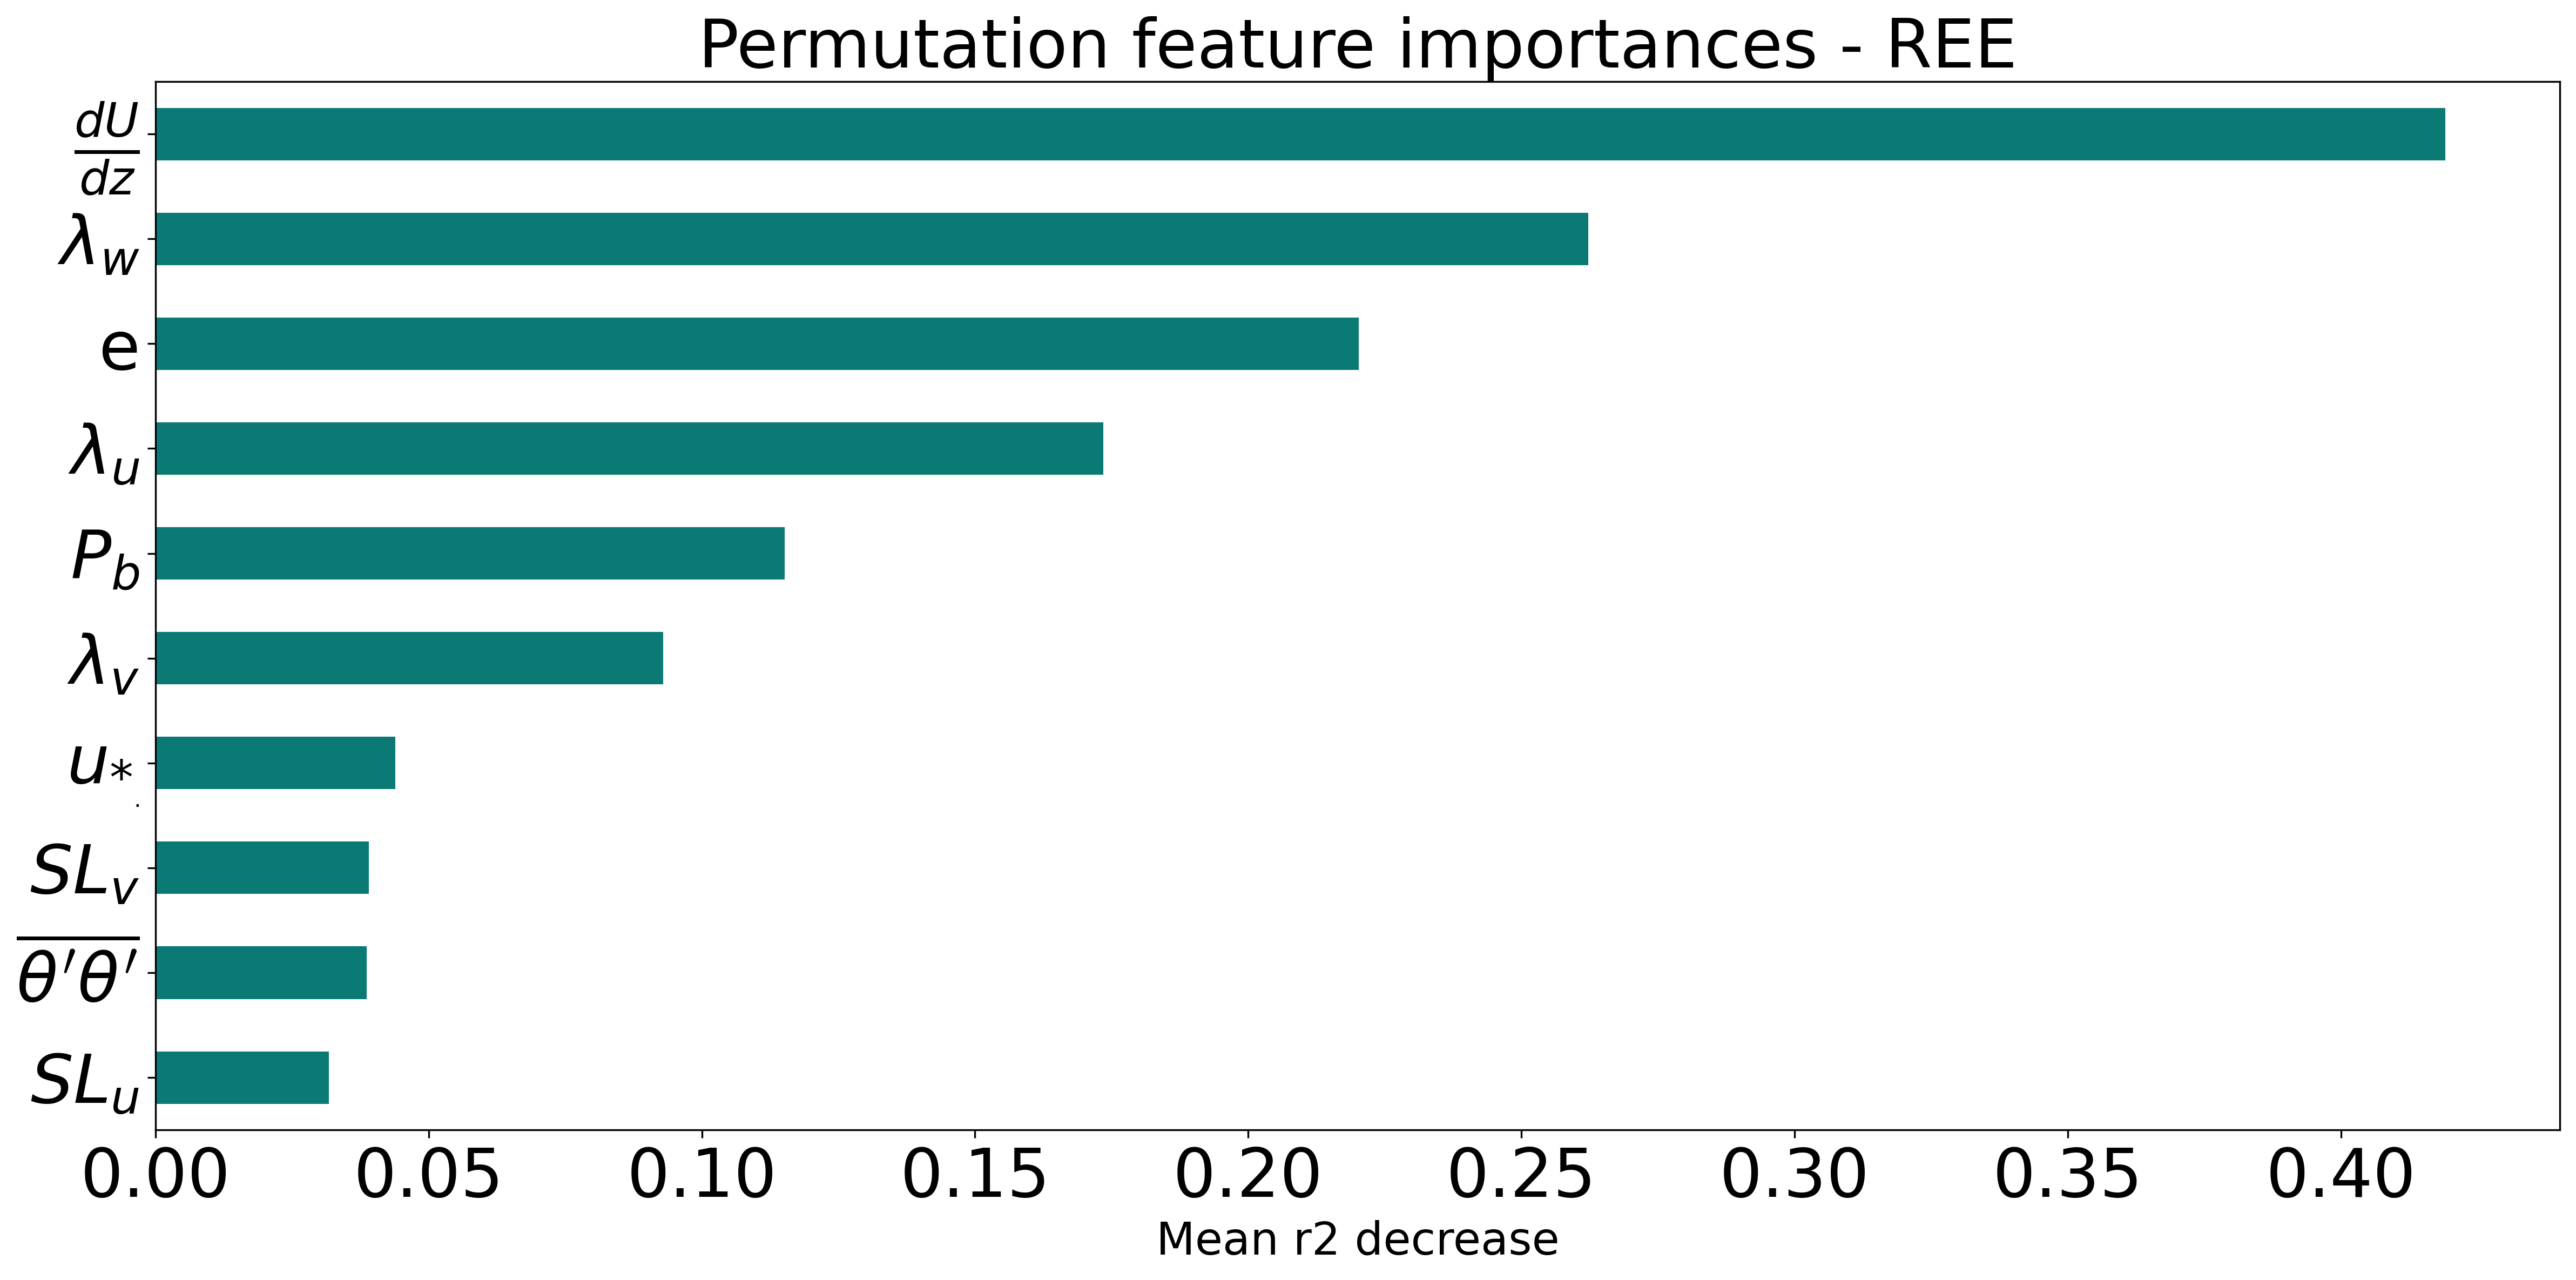

In [31]:
# plot permutation feature importances
fig, ax = plt.subplots(figsize=(16, 8))
forest_importances.plot.barh(ax=ax, legend=False, color="#0b7a75")
ax.set_title("Permutation feature importances - REE", fontsize=30)
ax.set_xlabel("Mean r2 decrease", fontsize=20)
for item in ax.get_xticklabels() + ax.get_yticklabels():
    item.set_fontsize(30)
fig.tight_layout()

#### heatmap comparison

In [27]:
ree_list = REE_FI.index[::-1]
forest_list = forest_FI.index[::-1]

In [28]:
color_list = ["#0a706b", "#f9f6f1", "#a51f12"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("name", color_list)

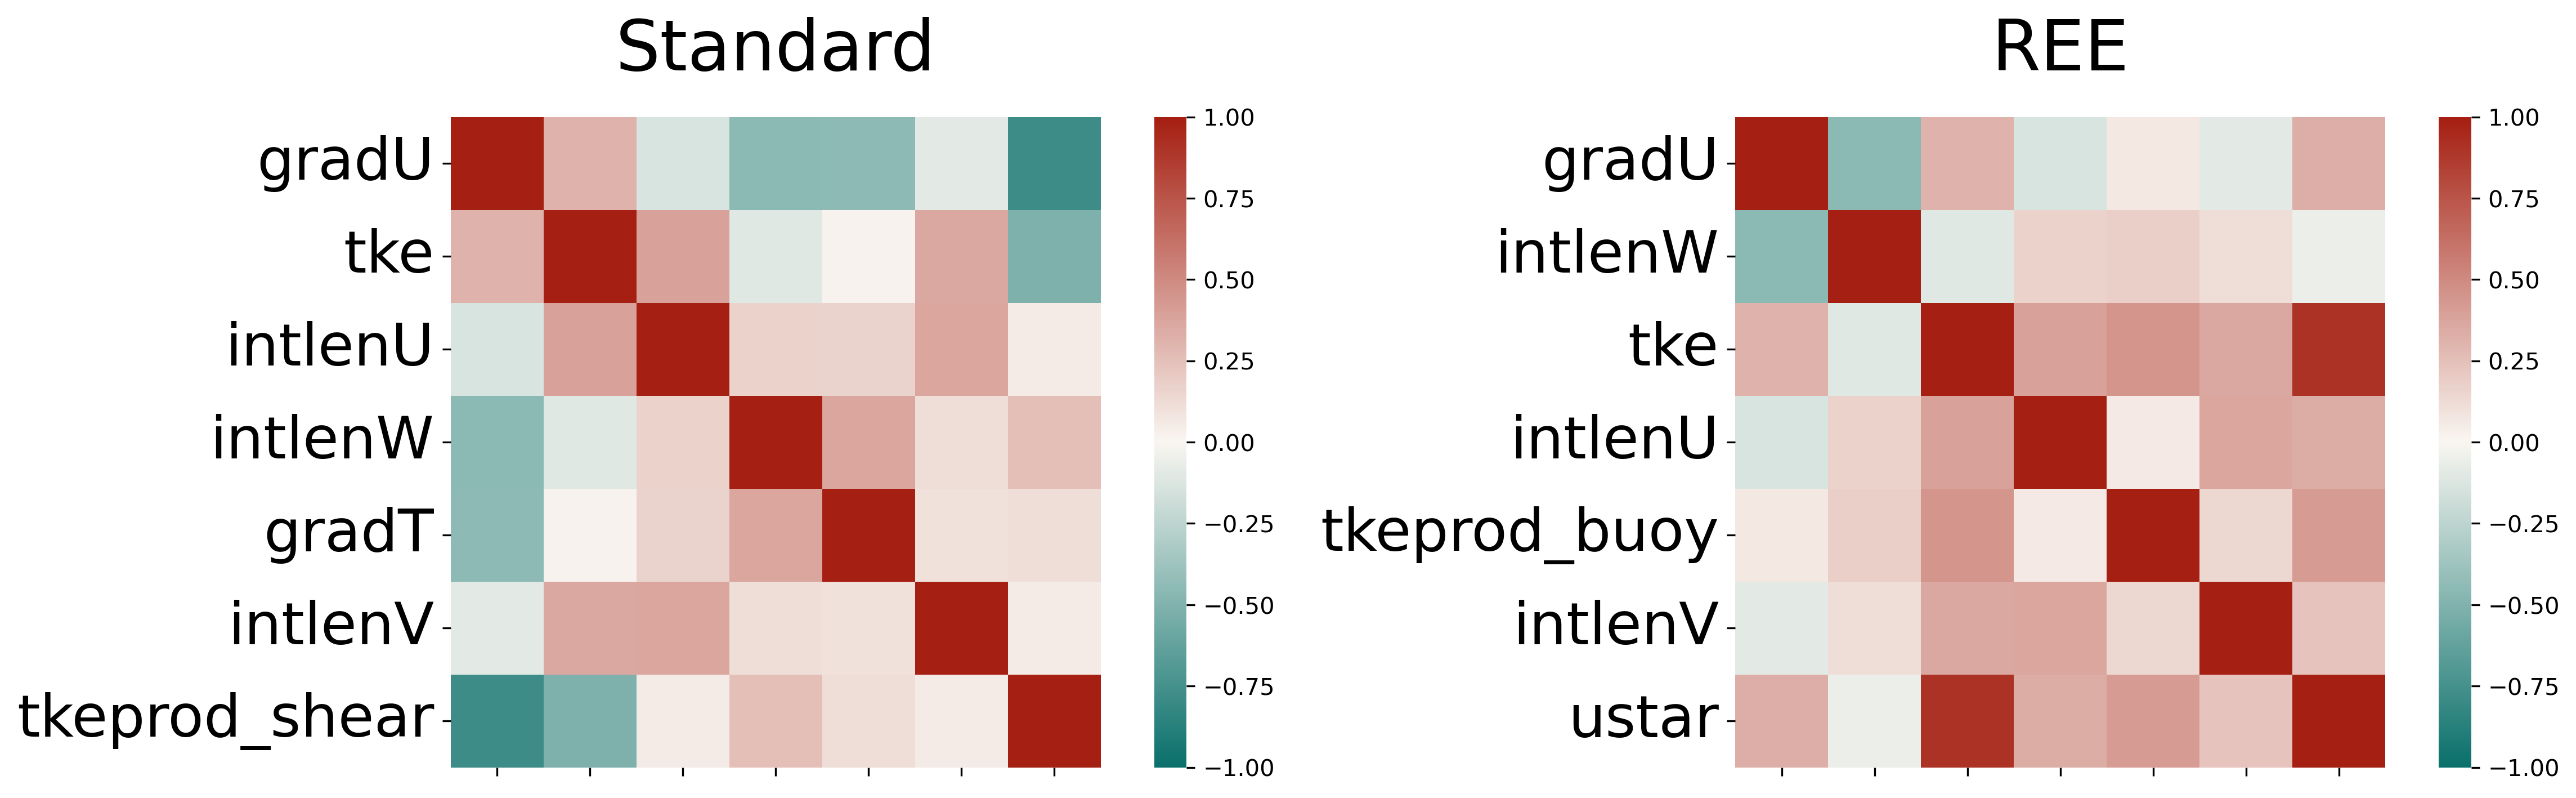

In [29]:
# correlation
correlations_ree = X_train[ree_list[0:7]].corr()
correlations_forest = X_train[forest_list[0:7]].corr()

# rename for shortness
correlations_ree = correlations_ree.rename(
    columns=labels_dict,
    index=labels_dict,
)
correlations_forest = correlations_forest.rename(
    columns=labels_dict,
    index=labels_dict,
)

# plot
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

axs[0].set_aspect(1)
axs[0].set_title("Standard", fontsize=30, pad=20)
axs[1].set_aspect(1)
axs[1].set_title("REE", fontsize=30, pad=20)

sns.heatmap(correlations_forest, cmap=cmap, ax=axs[0], vmin=-1, vmax=1)
sns.heatmap(correlations_ree, cmap=cmap, ax=axs[1], vmin=-1, vmax=1)

for ax in axs:
    for item in ax.get_yticklabels():
        item.set_fontsize(25)
        item.set_rotation(0)
    ax.set_xticklabels([])